<a href="https://colab.research.google.com/github/Kulenyonok/BIG_Data/blob/main/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
sales_of_company_x = pd.read_csv("/content/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("/content/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("/content/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("/content/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("/content/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("/content/daily-total-female-births-in-cal.csv")
car_sales = pd.read_csv("/content/monthly-car-sales-in-quebec-1960.csv")

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"],
    "Car sales in quebec 1960": car_sales["Count"]
}

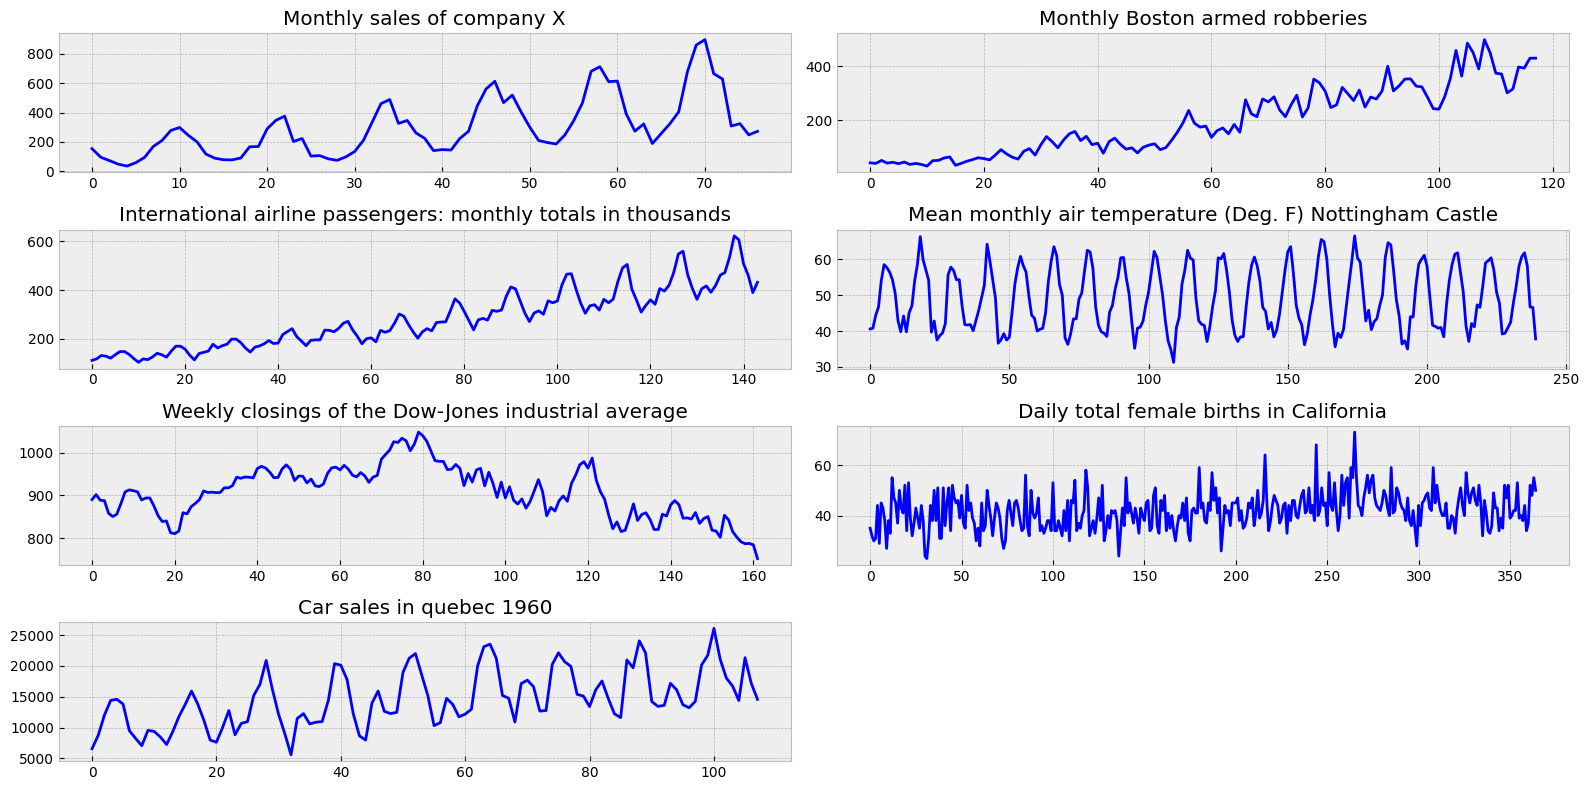

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (4, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [ ]:
from scipy.stats import boxcox

In [ ]:
transformed_series = {}
for key, series in all_series.items():
    transformed_series[key] = boxcox(series, 0)

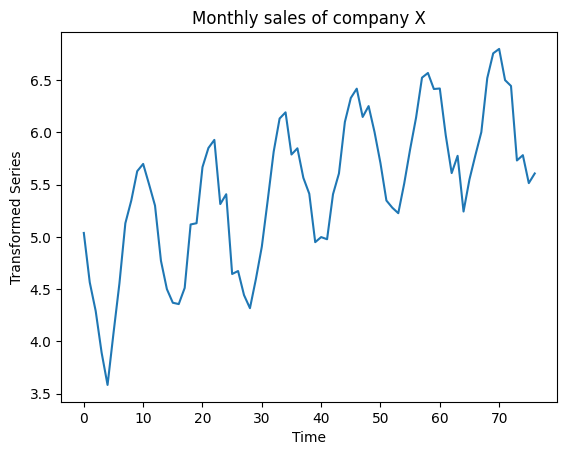

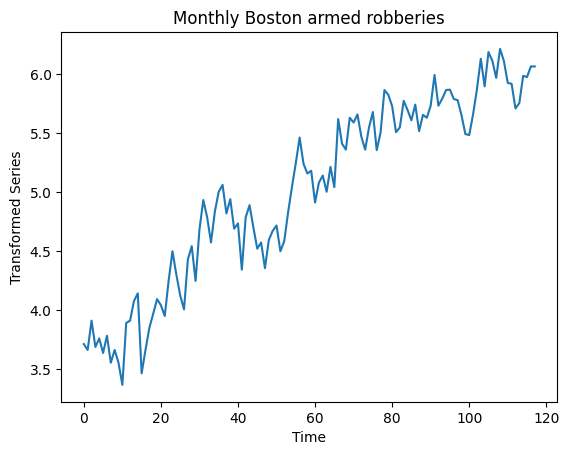

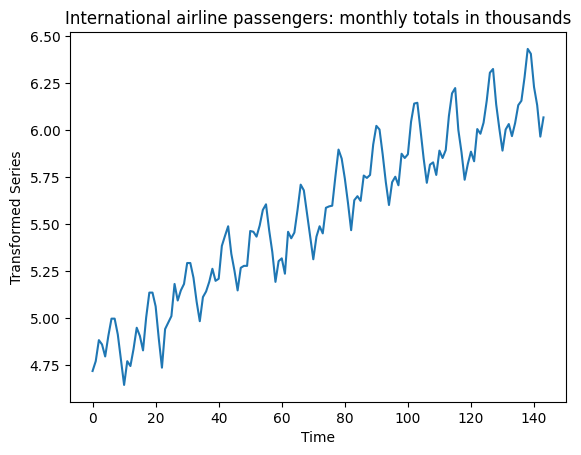

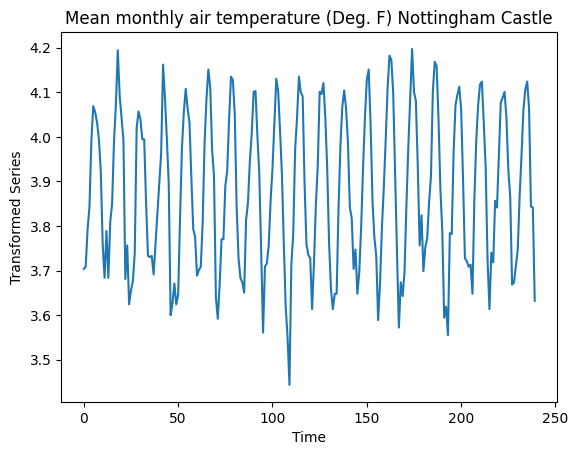

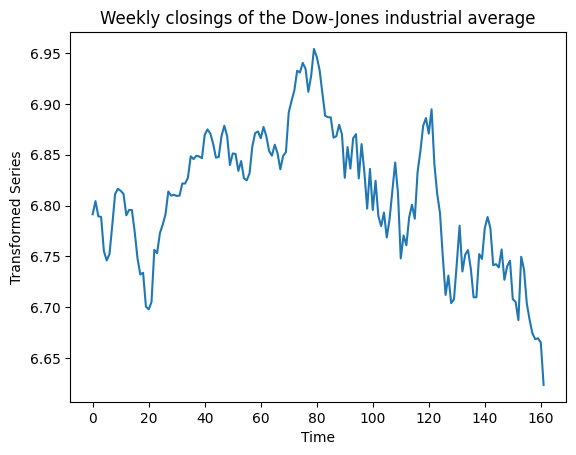

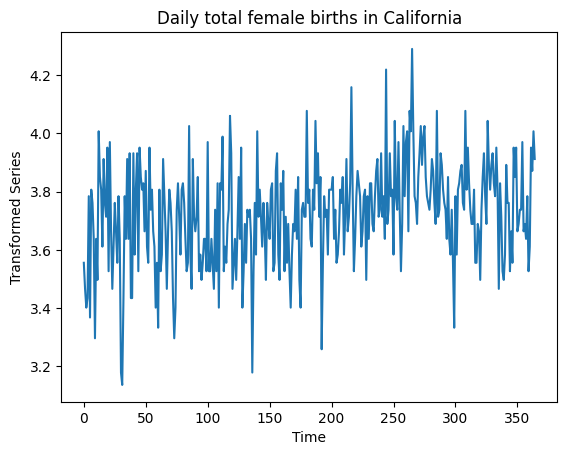

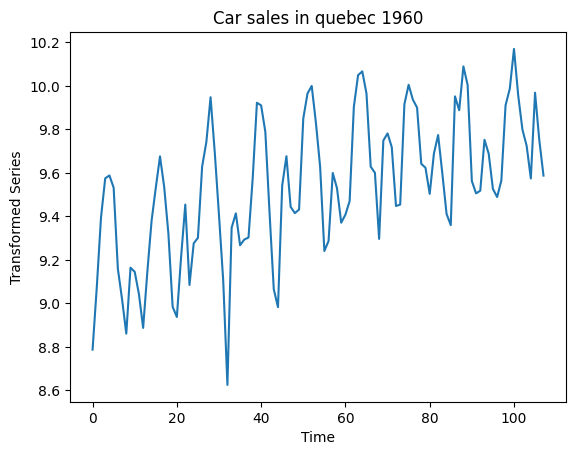

In [ ]:
for key, items in transformed_series.items():
    plt.plot(items)
    plt.title(key)
    plt.xlabel("Time")
    plt.ylabel("Transformed Series")
    plt.show()

In [ ]:
transformed_series_diff = {}
for key, value in transformed_series.items():
    transformed_series_diff[key] = np.diff(value, 1)

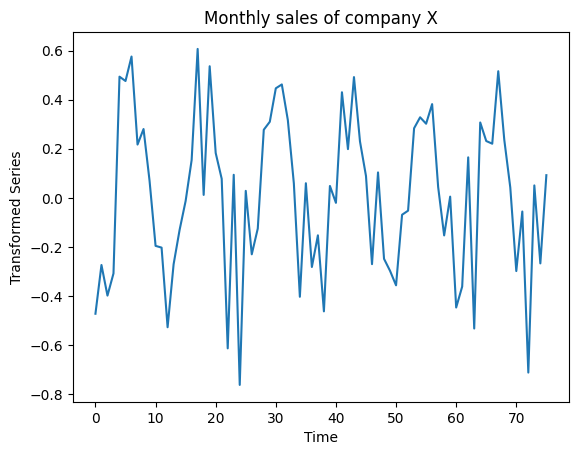

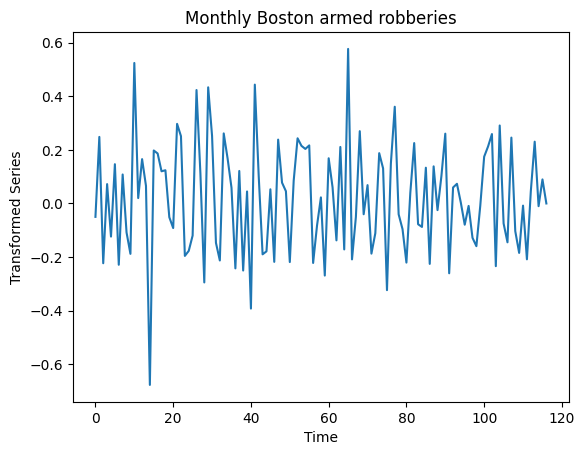

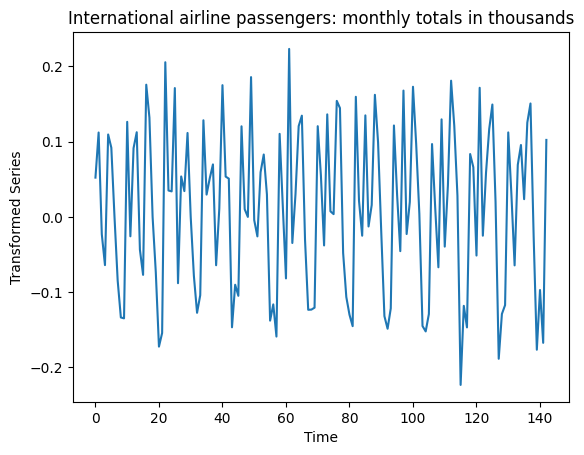

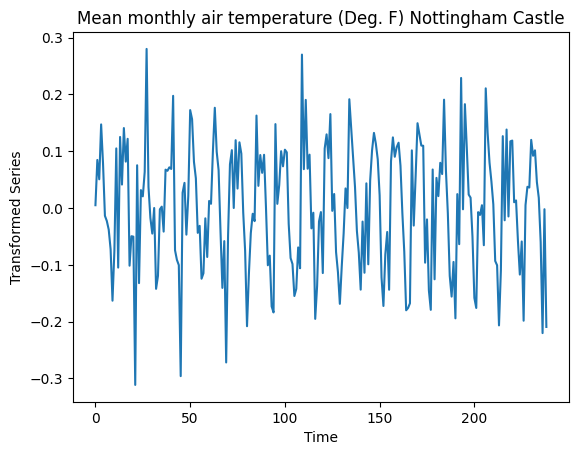

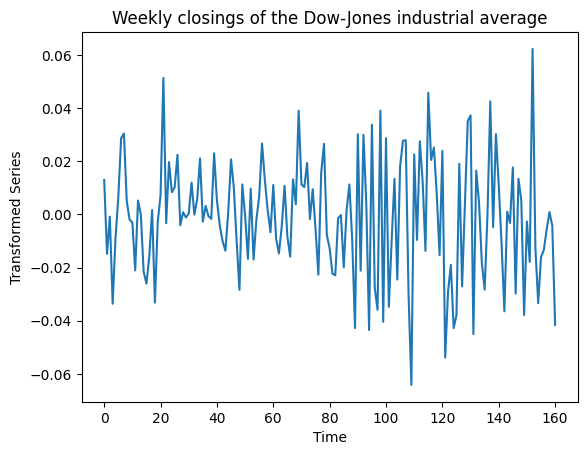

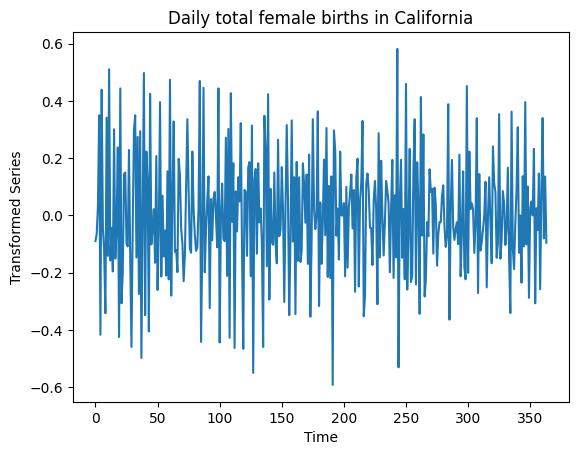

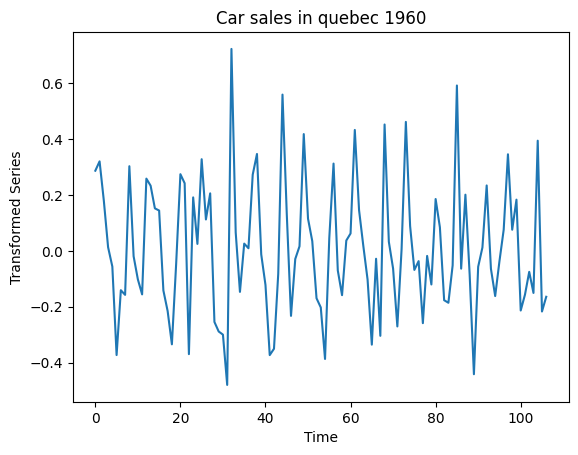

In [ ]:
for key, items in transformed_series_diff.items():
    plt.plot(items)
    plt.title(key)
    plt.xlabel("Time")
    plt.ylabel("Transformed Series")
    plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
for key, value in transformed_series_diff.items():
    print(key)
    test_stationarity(value)
    print('-------------------------------------')

Monthly sales of company X
Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
-------------------------------------
Monthly Boston armed robberies
Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64
-------------------------------------
International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#L